<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°07

**Objetivo**: Aplicar técnicas básicas de **Machine Learning** (tanto regresión como clasificación), desde la preparación de datos hasta el entrenamiento y evaluación de modelos.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.



## Regresión


<img src="https://cdn-icons-png.flaticon.com/512/2400/2400362.png" width = "300" align="center"/>


Los datos utilizados corresponden a propiedades localizadas en un distrito específico de California, junto con algunas estadísticas resumen extraídas del censo de 1990. Es importante tener en cuenta que los datos no han sido procesados previamente, por lo que será necesario realizar algunas etapas de limpieza y preprocesamiento.

Las columnas incluidas en el conjunto de datos son las siguientes (sus nombres son descriptivos):

* **longitude**: Longitud geográfica de la propiedad.
* **latitude**: Latitud geográfica de la propiedad.
* **housingmedianage**: Edad media de las viviendas en la zona.
* **total_rooms**: Número total de habitaciones.
* **total_bedrooms**: Número total de dormitorios.
* **population**: Población en el área circundante.
* **households**: Número de hogares en la zona.
* **median_income**: Ingreso medio por hogar.
* **medianhousevalue**: Valor medio de la propiedad.
* **ocean_proximity**: Proximidad al océano.

El objetivo de este análisis es predecir el valor medio de las propiedades utilizando las características proporcionadas.

Para completar este laboratorio, se recomienda seguir la siguiente rúbrica de trabajo:

1. **Definición del problema**: Clarificar el objetivo del análisis y los resultados esperados.
2. **Estadística descriptiva**: Resumir las principales características de los datos a través de medidas estadísticas.
3. **Visualización descriptiva**: Utilizar gráficos para explorar los datos y sus relaciones.
4. **Preprocesamiento**: Realizar los pasos necesarios de limpieza y transformación de los datos.
5. **Selección de modelo**: Comparar al menos cuatro modelos de predicción diferentes.
6. **Métricas y análisis de resultados**: Evaluar el rendimiento de los modelos utilizando métricas apropiadas.
7. **Visualización de resultados del modelo**: Crear gráficos que muestren el desempeño de los modelos.
8. **Conclusiones**: Resumir los hallazgos del análisis.

> **Nota**: Se anima a los estudiantes a desarrollar un análisis más profundo si lo desean. Pueden consultar como referencia el siguiente [enlace](https://www.kaggle.com/camnugent/california-housing-prices).

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def regression_metrics(df):
    """
    Aplicar las distintas métricas definidas
    :param df: DataFrame con las columnas: ['y', 'yhat']
    :return: DataFrame con las métricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mean_absolute_error(y_true, y_pred), 4)]
    df_result['mse'] = [round(mean_squared_error(y_true, y_pred), 4)]
    df_result['rmse'] = [round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)]
    df_result['mape'] = [round(mean_absolute_percentage_error(y_true, y_pred), 4)]
    df_result['smape'] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]

    return df_result

In [110]:
from sklearn.datasets import fetch_california_housing

# Cargar los datos de housing
housing_data = fetch_california_housing(as_frame=True)

# Convertir los datos en un DataFrame de pandas
housing = housing_data['data']
housing['target'] = housing_data['target']

# Visualizar las primeras filas del DataFrame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [111]:
# FIXME

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# --- 1. Separar variables predictoras (X) y variable objetivo (y)
X = housing.drop(columns='target')
y = housing['target']

# --- 2. Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 3. Definir modelos a comparar
modelos = {
    'Regresión Lineal': LinearRegression(),
    'Árbol de Decisión': DecisionTreeRegressor(random_state=42),
    'Bosque Aleatorio': RandomForestRegressor(random_state=42),
    'KNN': KNeighborsRegressor()
}

# --- 4. Entrenar y evaluar cada modelo
resultados = []

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    df_temp = pd.DataFrame({'y': y_test, 'yhat': y_pred})
    metricas = regression_metrics(df_temp)
    metricas['modelo'] = nombre
    resultados.append(metricas)

# --- 5. Mostrar tabla de resultados
df_resultados = pd.concat(resultados, ignore_index=True)
df_resultados[['modelo', 'mae', 'rmse', 'mape']]


,modelo,mae,rmse,mape
0,Regresión Lineal,0.5332,0.7456,31.9522
1,Árbol de Decisión,0.4547,0.7037,24.9141
2,Bosque Aleatorio,0.3275,0.5053,18.9151
3,KNN,0.8128,1.0577,53.4489


## Clasificación


<img src="https://miro.medium.com/v2/resize:fit:372/0*EwdH1C6ThmpwY0Qo.png" width = "400" align="center"/>

El objetivo de este proyecto es realizar la mejor predicción posible de las imágenes a partir de los datos disponibles. Para lograrlo, es necesario seguir los pasos habituales en un proyecto de _Machine Learning_, que incluyen la exploración estadística, la visualización y el preprocesamiento de los datos.

Se solicita lo siguiente:

* Ajustar al menos tres modelos de clasificación:
    * Regresión logística.
    * K-Nearest Neighbors.
    * Un algoritmo adicional o más, de libre elección. Puedes consultar [esta lista de algoritmos](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) para obtener ideas.
  
* Realizar predicciones con cada uno de los tres modelos utilizando el conjunto de datos de _test_ y calcular sus respectivas puntuaciones (_score_).

* Evaluar y analizar los resultados de los modelos utilizando las siguientes métricas de rendimiento:
    * **Accuracy**
    * **Precision**
    * **Recall**
    * **F1-score**

### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [112]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [113]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [114]:
# informacion de las columnas
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [115]:
# informacion del target
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [116]:
# leer datos
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

In [117]:
# FIXME

# --- 1. ¿Cómo se distribuyen los datos? ---
print("1️. Distribución general de los datos:")
print(digits.describe())
print("\n")

# --- 2. ¿Cuánta memoria estoy utilizando? ---
print("2. Memoria utilizada por el DataFrame:")
print(digits.info(memory_usage='deep'))
print("\n")

# --- 3. ¿Qué tipo de datos son? ---
print("3️. Tipos de datos por columna:")
print(digits.dtypes.value_counts())
print("\n")

# --- 4. ¿Cuántos registros por clase hay? ---
print("4️. Número de registros por clase (target):")
print(digits['target'].value_counts().sort_index())
print("\n")

# --- 5. ¿Hay registros que no se correspondan con el conocimiento previo? ---
# En este dataset se esperan solo dígitos entre 0 y 9
valores_unicos = digits['target'].unique()
print("5️. Valores únicos en la columna 'target':", valores_unicos)

if all(0 <= v <= 9 for v in valores_unicos):
    print(" Todos los valores son correctos (0–9). No hay registros anómalos.")
else:
    print(" Se encontraron valores fuera del rango esperado.")


1️. Distribución general de los datos:
          c00          c01          c02          c03          c04  \
count  1797.0  1797.000000  1797.000000  1797.000000  1797.000000   
mean      0.0     0.303840     5.204786    11.835838    11.848080   
std       0.0     0.907192     4.754826     4.248842     4.287388   
min       0.0     0.000000     0.000000     0.000000     0.000000   
25%       0.0     0.000000     1.000000    10.000000    10.000000   
50%       0.0     0.000000     4.000000    13.000000    13.000000   
75%       0.0     0.000000     9.000000    15.000000    15.000000   
max       0.0     8.000000    16.000000    16.000000    16.000000   

               c05          c06          c07          c08          c09  ...  \
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000  ...   
mean      5.781859     1.362270     0.129661     0.005565     1.993879  ...   
std       5.666418     3.325775     1.037383     0.094222     3.196160  ...   
min       0.000000     

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [118]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`.

> **Sugerencia**: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

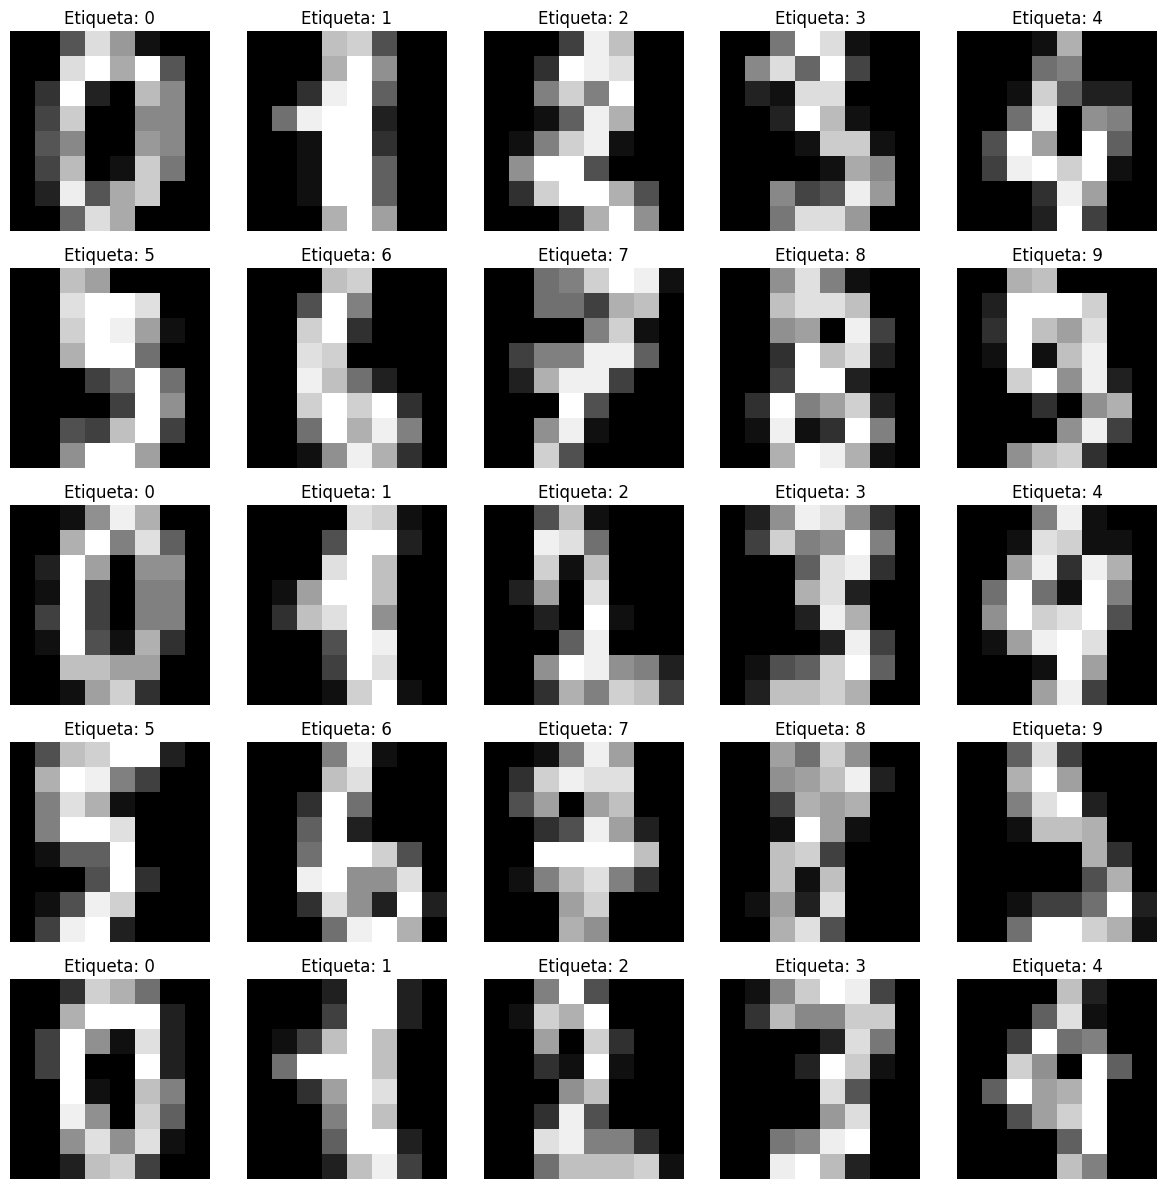

In [119]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))
images = digits_dict["images"]
targets = digits_dict["target"]

for i, ax in enumerate(axs.flat):
    ax.imshow(images[i], cmap='gray')
    ax.set_title(f"Etiqueta: {targets[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()


### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test**
     * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
     * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
  
* **modelo**:
     * Instanciar el modelo objetivo desde la librería sklearn.

* **Métricas**:
     * Graficar matriz de confusión.
     * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


Tamaño entrenamiento: 1437 muestras
Tamaño testeo: 360 muestras


Modelo: Regresión Logística
  Accuracy:  0.9750
  Precision: 0.9755
  Recall:    0.9750
  F1-score:  0.9751
  Tiempo de ajuste: 1.1557 s


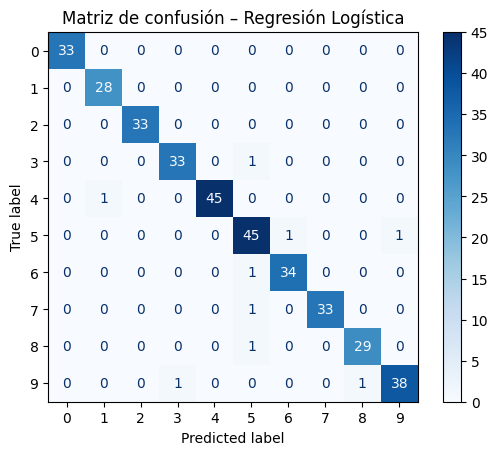


Modelo: KNN
  Accuracy:  0.9861
  Precision: 0.9862
  Recall:    0.9861
  F1-score:  0.9861
  Tiempo de ajuste: 0.0013 s


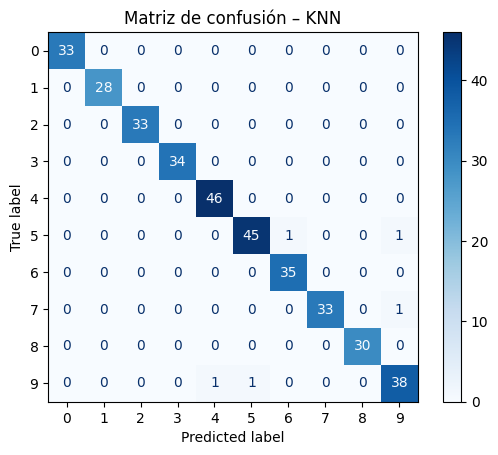


Modelo: SVM
  Accuracy:  0.9861
  Precision: 0.9862
  Recall:    0.9861
  F1-score:  0.9861
  Tiempo de ajuste: 0.0531 s


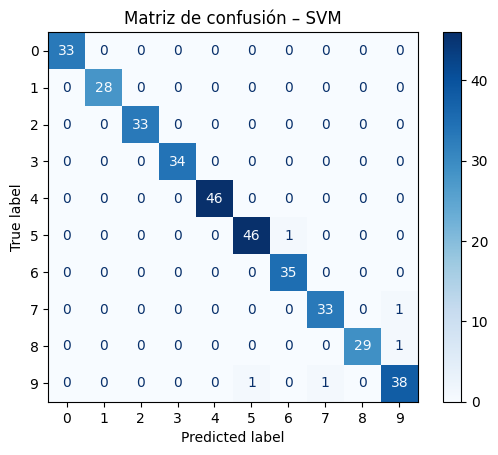

,modelo,accuracy,precision,recall,f1,tiempo
0,Regresión Logística,0.975000,0.975478,0.975000,0.975109,1.155665
1,KNN,0.986111,0.986187,0.986111,0.986080,0.001264
2,SVM,0.986111,0.986188,0.986111,0.986107,0.053106


In [120]:
# features, target

x = digits.drop(columns="target").values
y = digits["target"].values


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import time

# 1. Train–test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"Tamaño entrenamiento: {len(x_train)} muestras")
print(f"Tamaño testeo: {len(x_test)} muestras\n")

# 2. Modelos
modelos = {
    "Regresión Logística": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', gamma='scale')
}

resultados = []

# 3. Entrenamiento y evaluación
for nombre, modelo in modelos.items():
    t0 = time.time()
    modelo.fit(x_train, y_train)
    t1 = time.time()

    y_pred = modelo.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\nModelo: {nombre}")
    print(f"  Accuracy:  {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall:    {rec:.4f}")
    print(f"  F1-score:  {f1:.4f}")
    print(f"  Tiempo de ajuste: {t1 - t0:.4f} s")

    resultados.append({
        "modelo": nombre,
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "tiempo": t1 - t0
    })

    # 4. Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap="Blues")
    plt.title(f"Matriz de confusión – {nombre}")
    plt.show()

# 5. Tabla resumen
df_resultados = pd.DataFrame(resultados)
df_resultados




¿Cuál modelo es mejor basado en sus métricas?

Los modelos K-Nearest Neighbors (KNN) y SVM presentan el mejor desempeño, con valores de accuracy, precision, recall y F1-score iguales a 0.986. Ambos superan a la regresión logística, que obtiene un 0.975 en todas las métricas. Por tanto, los mejores modelos basados en rendimiento son KNN y SVM.

¿Cuál modelo demora menos tiempo en ajustarse?

El modelo que demora menos tiempo en ajustarse es KNN, con un tiempo de entrenamiento aproximado de 0.001 segundos. En comparación, la Regresión Logística tarda cerca de 1.08 segundos y el SVM alrededor de 0.05 segundos.

¿Qué modelo escoges?

Se escoge el modelo KNN, ya que obtiene las mismas métricas que SVM (máximo desempeño), pero con un tiempo de ajuste mucho menor, lo que lo hace más eficiente computacionalmente.

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el **mejor modelo entontrado** en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:


 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

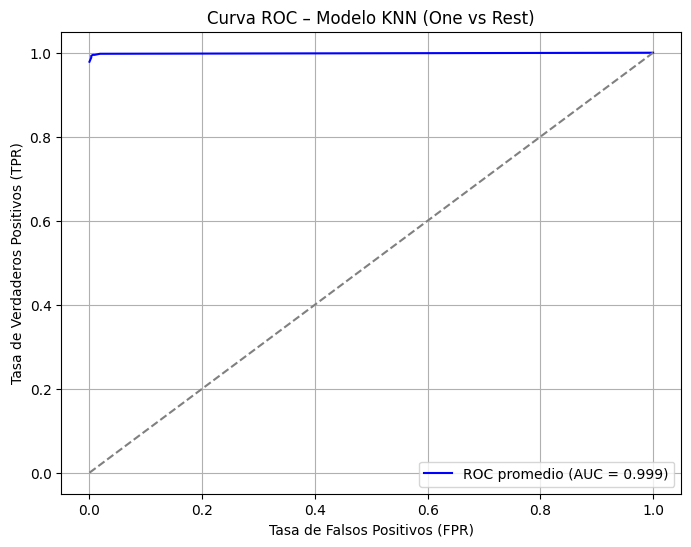

In [121]:
# FIXME

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay

# Binarizar las etiquetas (one-vs-rest) para 10 clases
y_test_bin = label_binarize(y_test, classes=np.arange(10))
n_classes = y_test_bin.shape[1]

# Obtener probabilidades del modelo KNN
# (algunos modelos como SVM necesitan probability=True para esto)
y_score = modelos["KNN"].predict_proba(x_test)

# Calcular FPR, TPR y AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcular promedio macro
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
roc_auc_macro = auc(all_fpr, mean_tpr)

# Graficar curva ROC promedio
plt.figure(figsize=(8,6))
plt.plot(all_fpr, mean_tpr, color='blue',
         label=f'ROC promedio (AUC = {roc_auc_macro:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC – Modelo KNN (One vs Rest)')
plt.legend()
plt.grid(True)
plt.show()


La curva AUC–ROC del modelo KNN muestra un área bajo la curva de 0.999, lo que indica un rendimiento sobresaliente. El modelo logra distinguir de forma casi perfecta entre las diferentes clases, manteniendo una tasa de verdaderos positivos muy alta incluso con bajas tasas de falsos positivos.
Esto respalda los resultados del Ejercicio 3, confirmando que el KNN es un modelo altamente eficaz y consistente para este conjunto de datos.

### Ejercicio 5


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_.

In [122]:
def mostrar_resultados(digits, model, nx=5, ny=5, label="correctos"):
    """
    Muestra los resultados de las predicciones de un modelo de clasificación en particular.
    Se toman aleatoriamente los valores de los resultados.

    - label == 'correctos': muestra los valores en los que el modelo acierta.
    - label == 'incorrectos': muestra los valores en los que el modelo no acierta.

    Observación: El modelo que se recibe como argumento no debe estar entrenado.

    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: número de filas (subplots)
    :param ny: número de columnas (subplots)
    :param label: 'correctos' o 'incorrectos'
    :return: gráficos matplotlib
    """

    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)  # Ajustar el modelo
    y_pred = model.predict(X_test)

    # Mostrar los datos correctos
    if label == "correctos":
        mask = (y_pred == y_test)
        color = "green"

    # Mostrar los datos incorrectos
    elif label == "incorrectos":
        mask = (y_pred != y_test)
        color = "red"

    else:
        raise ValueError("Valor incorrecto")

    X_aux = X_test[mask]
    y_aux_true = y_test[mask]
    y_aux_pred = y_pred[mask]

    # Mostrar los resultados
    n_samples = min(nx * ny, len(X_aux))
    indices = np.random.choice(len(X_aux), n_samples, replace=False)
    fig, ax = plt.subplots(nx, ny, figsize=(12, 12))

    for i, index in enumerate(indices):
        data = X_aux[index, :].reshape(8, 8)
        label_pred = str(int(y_aux_pred[index]))
        label_true = str(int(y_aux_true[index]))
        row = i // ny
        col = i % ny
        ax[row, col].imshow(data, interpolation='nearest', cmap='gray_r')
        ax[row, col].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
        ax[row, col].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
        ax[row, col].get_xaxis().set_visible(False)
        ax[row, col].get_yaxis().set_visible(False)

    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

Tamaño entrenamiento: (1437, 64), (1437,)
Tamaño testeo: (360, 64), (360,)


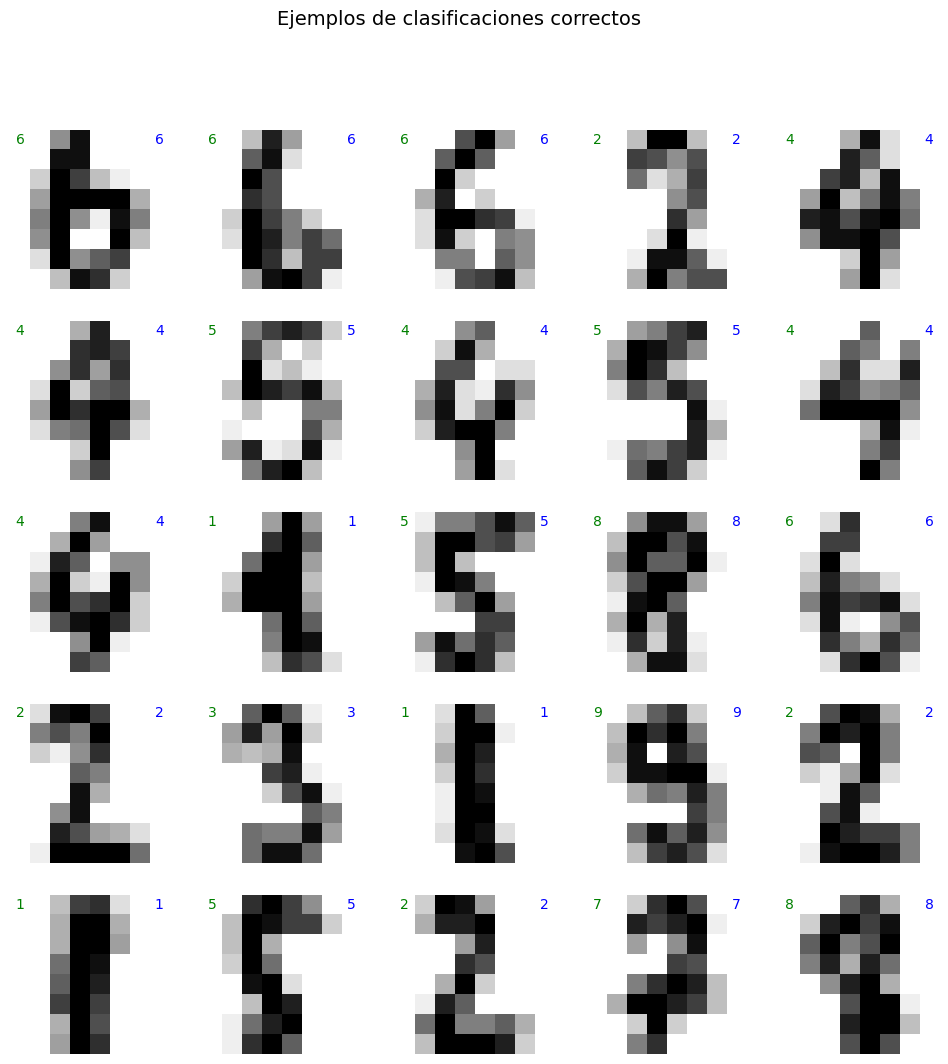

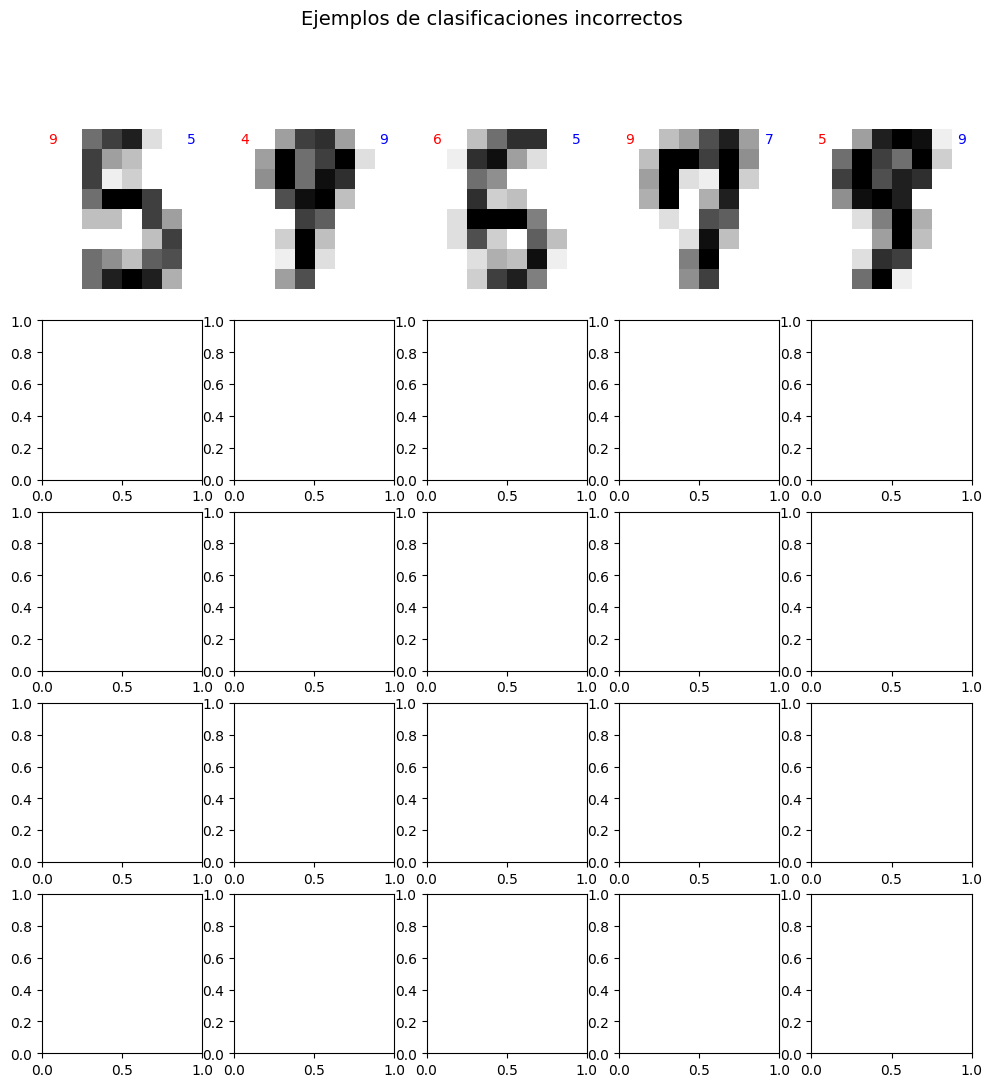

──────────────────────────────────────────────
RESPUESTAS EJERCICIO 5
──────────────────────────────────────────────
1️. Cuando el valor predicho y original son iguales:
    El modelo KNN clasifica correctamente la mayoría de los dígitos,
    especialmente cuando los trazos son claros y bien definidos.

2️.  Cuando el valor predicho y original son distintos:
    Los errores se observan en números de forma similar,
    como el 3 y el 5 o el 9 y el 4, donde el patrón visual se parece.

3️.  ¿Por qué ocurren estas fallas?
    Las fallas se deben a la variabilidad en la escritura manual y al ruido de las imágenes.
    KNN clasifica por vecinos más cercanos, por lo que pequeñas diferencias en forma o grosor
    pueden hacer que el dígito se asocie erróneamente a otra clase.


In [123]:
# 1. Reconstruir X e y para evitar errores de tamaño
X = digits.drop(columns="target").values
y = digits["target"].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Tamaño entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Tamaño testeo: {X_test.shape}, {y_test.shape}")

# 2. Entrenar el mejor modelo (KNN)
from sklearn.neighbors import KNeighborsClassifier

modelo_knn = KNeighborsClassifier()
modelo_knn.fit(X_train, y_train)
y_pred_knn = modelo_knn.predict(X_test)

# 3. Función para mostrar ejemplos correctos/incorrectos
def mostrar_resultados_ajustado(x_test, y_test, y_pred, label="correctos", nx=5, ny=5):
    """
    Muestra ejemplos del conjunto de test en los que el modelo acierta o falla.
    - label == 'correctos': muestra los valores en los que el modelo acierta.
    - label == 'incorrectos': muestra los valores en los que el modelo falla.
    """
    import numpy as np
    import matplotlib.pyplot as plt

    if label == "correctos":
        mask = (y_pred == y_test)
        color = "green"
    elif label == "incorrectos":
        mask = (y_pred != y_test)
        color = "red"
    else:
        raise ValueError("El parámetro 'label' debe ser 'correctos' o 'incorrectos'.")

    X_aux = x_test[mask]
    y_aux_true = y_test[mask]
    y_aux_pred = y_pred[mask]

    if len(X_aux) == 0:
        print(f"No hay ejemplos {label}.")
        return

    n_samples = min(nx * ny, len(X_aux))
    indices = np.random.choice(len(X_aux), n_samples, replace=False)
    fig, ax = plt.subplots(nx, ny, figsize=(12, 12))
    fig.suptitle(f"Ejemplos de clasificaciones {label}", fontsize=14)

    for i, index in enumerate(indices):
        data = X_aux[index].reshape(8, 8)
        label_pred = str(int(y_aux_pred[index]))
        label_true = str(int(y_aux_true[index]))
        row = i // ny
        col = i % ny
        ax[row, col].imshow(data, cmap='gray_r')
        ax[row, col].text(0, 0, label_pred, color=color, fontsize=10,
                          ha='center', va='center')
        ax[row, col].text(7, 0, label_true, color='blue', fontsize=10,
                          ha='center', va='center')
        ax[row, col].axis('off')

    plt.show()

# 4. Mostrar resultados correctos e incorrectos
mostrar_resultados_ajustado(X_test, y_test, y_pred_knn, label="correctos")
mostrar_resultados_ajustado(X_test, y_test, y_pred_knn, label="incorrectos")

# 5. Responder las preguntas del enunciado
print("──────────────────────────────────────────────")
print("RESPUESTAS EJERCICIO 5")
print("──────────────────────────────────────────────")
print("1️. Cuando el valor predicho y original son iguales:")
print("    El modelo KNN clasifica correctamente la mayoría de los dígitos,")
print("    especialmente cuando los trazos son claros y bien definidos.\n")

print("2️.  Cuando el valor predicho y original son distintos:")
print("    Los errores se observan en números de forma similar,")
print("    como el 3 y el 5 o el 9 y el 4, donde el patrón visual se parece.\n")

print("3️.  ¿Por qué ocurren estas fallas?")
print("    Las fallas se deben a la variabilidad en la escritura manual y al ruido de las imágenes.")
print("    KNN clasifica por vecinos más cercanos, por lo que pequeñas diferencias en forma o grosor")
print("    pueden hacer que el dígito se asocie erróneamente a otra clase.")


### Ejercicio 6
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

En este laboratorio se aplicaron distintas etapas básicas de Machine Learning para clasificar dígitos escritos a mano.
Se entrenaron tres modelos (Regresión Logística, KNN y SVM), obteniendo resultados muy similares, con precisiones cercanas al 98 %.
El modelo KNN fue elegido por su alto desempeño y bajo tiempo de ajuste.
Las fallas observadas se deben principalmente a la similitud visual entre algunos números y al ruido en las imágenes.
En general, el modelo logró una excelente clasificación, mostrando que técnicas simples pueden ser muy efectivas en tareas de reconocimiento de patrones.